<a href="https://colab.research.google.com/github/NohmanAudi/H_and_M/blob/main/H%26M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <font color='#CD2026'> H&M Analytics</center>


---
### Introduction

<p align='justify'>The fashion industry is a very volatile one. It depends on a huge number of factors influncing the success of a company. It starts from effeciency in internal business operations considering product quality and services associated with it, while looking at time-to-market and delivery. Customer satisfaction, retention, and portfolio "which define the customer perception" are high importance feature to consider while evaluating the success of the business. They contribute to the public image of the company and its reputation. It is essential as well to look at the cash flow and market share, and to consider revenue and ROI.
</p>

In this project, I will leverage data published by H&M, that includes three different datasets namely: Transactions, Customers, Articles, to explore some of the factors mentioned above, and deliver insight from the data.


# Installing H&M Data from Kaggle and Importing libraries

In [ ]:
'''! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download h-and-m-personalized-fashion-recommendations
! unzip h-and-m-personalized-fashion-recommendations.zip'''

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [4]:
transactions = pd.read_csv("/content/drive/MyDrive/HM_data/transactions_train.csv")
#articles = pd.read_csv("articles.csv")
#customers = pd.read_csv("customers.csv")
#sample = pd.read_csv(os.path.join(DIR, "sample_submission.csv"))

**Starting with exploration of each dataset to get familiar with the data**

# Transactions Data

In [5]:
#Exploring the transactions data
transactions = pd.read_csv("/content/drive/MyDrive/HM_data/transactions_train.csv")
transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


In [6]:
#checking column data types
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [7]:
#Change Transaction Date to appropriate datetime object
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['t_dat']

0          2018-09-20
1          2018-09-20
2          2018-09-20
3          2018-09-20
4          2018-09-20
              ...    
31788319   2020-09-22
31788320   2020-09-22
31788321   2020-09-22
31788322   2020-09-22
31788323   2020-09-22
Name: t_dat, Length: 31788324, dtype: datetime64[ns]

* Data spans from 20-09-2018 to 22-09-2020 covering 2 years of transactions.
* Data includes more than 31 million transactions.

In [8]:
#Checking for missing values
transactions.isna().any()

t_dat               False
customer_id         False
article_id          False
price               False
sales_channel_id    False
dtype: bool

In [19]:
#Checking frequency of transactions by customers
transactions_by_customer = transactions.customer_id.value_counts()
transactions_by_customer

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
                                                                    ... 
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f       1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613       1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69       1
62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e71435d2dd190d1ccc4       1
268eaa31a07d6f2f4f060bfcf32a660f3ea3dbb21ef14cd09fc2545f4e0b5c10       1
Name: customer_id, Length: 1362281, dtype: int64

In [20]:
#What about the distribution of frequencies
pd.set_option('float_format', '{:f}'.format) #to view full numeric value
transactions_by_customer.describe()

count   1362281.000000
mean         23.334631
std          39.242253
min           1.000000
25%           3.000000
50%           9.000000
75%          27.000000
max        1895.000000
Name: customer_id, dtype: float64

In [31]:
transactions_by_customer.quantile(.99998)

944.0528000025079

We have over 1.3 million unique customers.

Just 0.002% of the customers are responsible for half of the transactions.

In [35]:
#Top 20 customers
transactions_by_customer.head(20)

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    1117
3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2    1115
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54    1099
e6498c7514c61d3c24669f49753dc83fdff3ec1ba13902dd918

I am curious to see what the buying habits of those customers are. Lets explore it later.

In [39]:
# Frequency of transactions by article
transactions_by_article = transactions.article_id.value_counts()
transactions_by_article

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [58]:
transactions_by_article.quantile(.99999999)

50271.063007571094

We have around a 100k unique items purchased

Only a small fraction of the articles are responsible for half of transactions

In [64]:
# We will also check these extremely high purchased articles later as well
transactions_by_article.head(15)

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
720125001    21063
156231001    21013
562245046    20719
562245001    20464
351484002    20415
Name: article_id, dtype: int64

**Costumer_id and Article_id are foreign keys used to join the data later on.**

In [65]:
#Price column represent price per transaction
#Let's check out some characteristics
#prices are scaled in the dataset and do not show actual value
transactions.price.describe()

count   31788324.000000
mean           0.027829
std            0.019181
min            0.000017
25%            0.015814
50%            0.025407
75%            0.033881
max            0.591525
Name: price, dtype: float64

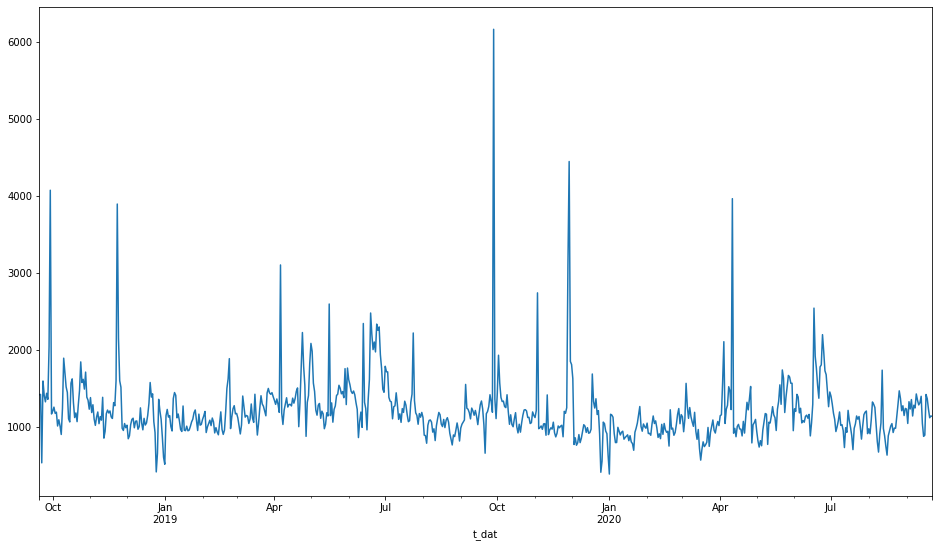

In [69]:
#plotting total transaction prices per date
transaction_per_date = transactions.groupby('t_dat')['price'].sum()
transaction_per_date.plot(figsize = (16,9))

**It seems like there is a spike in transaction values in certain dates, let's check them**

In [70]:
transaction_spike = transaction_per_date[transaction_per_date.values > 3000]
pd.Series(transaction_spike.values, transaction_spike.index.day_name())

t_dat
Saturday   4071.381305
Friday     3891.939441
Saturday   3100.904898
Saturday   6161.603068
Thursday   3103.027932
Friday     4444.342390
Saturday   3961.987763
dtype: float64

* We see some patterns in the spike, weekends are good days for H&M, especially the last saturday of september
* We will stop there for now, there is still much to explore like monthly fluctuations and days of week and holidays but they are outside the scope of this work

In [ ]:
transactions.sales_channel_id.value_counts()

Sales channel represent the method of selling, either 2:ONLINE or 1:OFFLINE

# Customer Data

In [ ]:
customers.head(7)

In [ ]:
customers.groupby('customer_id')['age'].mean()

In [ ]:
#customers.dtypes
customers.info()

In [ ]:
#checking for missing values
customers.isna().any()

We have lots of missing values, we will explore each column and assess how to deal with each

In [ ]:
#FN indicates if a customer get Fashion News newsletter
customers.FN.value_counts()

In [ ]:
#FN represents if customer get Fashion News newsletter 1:yes, 0:no
#fiiling NA with 0 and converting values to integers
customers.FN = customers.FN.fillna(value=0).astype(int)

In [ ]:
#Active indicates if the customer is active for communication
customers.Active.value_counts()

In [ ]:
#Again filling missing values with 0 >>> 1:active, 0:not active
customers.Active = customers.Active.fillna(value=0).astype(int)

In [ ]:
#checking whether a customer is a club member
customers.club_member_status.value_counts()

In [ ]:
#How many missing values we have?
customers.club_member_status.isna().value_counts()

In [ ]:
#missing values seem to indicate a not a club member status so will fill it in as such
customers.club_member_status = customers.club_member_status.fillna(value='NOT_IN_CLUB')

In [ ]:
#indicates how often a customer interacts with fashion news
customers.fashion_news_frequency.value_counts()

In [ ]:
customers.fashion_news_frequency.isna().value_counts()

In [ ]:
#We have redundant NONE with different capitalisation, and we will deal with missing vaues as NONE as well
customers.fashion_news_frequency = customers.fashion_news_frequency.fillna(value='NONE')
customers.fashion_news_frequency = customers.fashion_news_frequency.replace('None','NONE')

In [ ]:
#Age missing values is going to be tricky, will try different techniques after exploring the vaues
customers.age.isna().value_counts()

In [ ]:
customers.age.hist()

In [ ]:
customers[customers.age.isna()]

* **We can fill in age missing values with mean but I will postpone this until after I explore the article dataset, maybe purchase type might give a hint about the age group!**
* **Other columns do not seem to be good indicators of age**

# Article Data

In [ ]:
articles.head(10)

In [ ]:
articles.info()

**seems like we only have missing values in the 'detail_desc' column**

In [ ]:
articles.corr()

In [ ]:
#Dropping duplicate columns containing string values for speed
articles.drop(['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name',
               'perceived_colour_value_name', 'perceived_colour_master_name',
               'department_name', 'index_name',
               'index_group_name', 'section_name',
               'garment_group_name'], axis=1, inplace=True)

In [ ]:
articles.head()

In [ ]:
#Joining the data so we can do different kinds of groupings and study relationships in the data
merged = pd.merge(transactions, customers, on="customer_id")
merged = pd.merge(merged, articles, on="article_id")

In [ ]:
merged.head()

In [ ]:
merged.age.isna().value_counts()
merged.groupby('product_type_no')['age'].mean()

There are some variations in average age buying batterns of specific product types, it is definitely a better indicator of age missing values that just the mean of all values.
We will fill the missing age values with the appropriate age means

In [ ]:
merged['age'] = merged['age'].fillna(merged.groupby('product_type_no')['age'].transform('mean'))
merged['age'] = merged.age.astype(int)

In [ ]:
merged.age.isna().any()

In [ ]:
merged.age.value_counts()

It is recommended at times to do bins for the age groups. However, since there are a lot of records for each age, then it is best to keep it as a continuos value and avoid loss of information

In [ ]:
#merged.corr()

In [ ]:
from lightfm import LightFM